In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
raw_train = pd.read_csv('train.csv')

In [6]:
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train=raw_train.copy()

In [8]:
train.shape

(1460, 81)

In [9]:
train[train.Alley.isnull()].shape

(1369, 81)

In [13]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

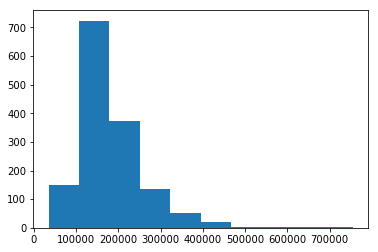

In [23]:
plt.hist(train.SalePrice)

(array([  11.,   38.,   99.,  232.,  273.,  218.,  176.,  104.,   93.,
          58.,   42.,   35.,   24.,   10.,   17.,    8.,    7.,    4.,
           2.,    1.,    1.,    2.,    1.,    0.,    2.,    0.,    0.,
           0.,    0.,    2.]),
 array([  34900.        ,   58903.33333333,   82906.66666667,
         106910.        ,  130913.33333333,  154916.66666667,
         178920.        ,  202923.33333333,  226926.66666667,
         250930.        ,  274933.33333333,  298936.66666667,
         322940.        ,  346943.33333333,  370946.66666667,
         394950.        ,  418953.33333333,  442956.66666667,
         466960.        ,  490963.33333333,  514966.66666667,
         538970.        ,  562973.33333333,  586976.66666667,
         610980.        ,  634983.33333333,  658986.66666667,
         682990.        ,  706993.33333333,  730996.66666667,  755000.        ]),
 <a list of 30 Patch objects>)

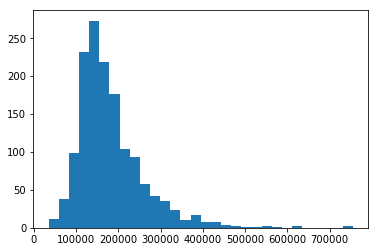

In [29]:
plt.hist(train.SalePrice, bins=30)

In [30]:
np.corrcoef(train.LotArea, train.GarageArea)

array([[ 1.        ,  0.18040276],
       [ 0.18040276,  1.        ]])

In [33]:
import seaborn as sns
%matplotlib inline

# load the R package ISLR
infert = pd.rpy.common.importr("ISLR")

# load the Auto dataset
auto_df = pd.rpy.common.load_data('train')

# calculate the correlation matrix
corr = auto_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

AttributeError: module 'pandas' has no attribute 'rpy'